In [1]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import pickle as pickle
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
TARGET_COLS=['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',"clean"]

from sklearn.model_selection import train_test_split


## UNIGRAMS - See this everyother code is same

In [2]:
import pandas as pd
target_x=pickle.load(open("../pickle/target_x1_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)


[[ 176  609]
 [ 160 2900]]
             precision    recall  f1-score   support

          0       0.52      0.22      0.31       785
          1       0.83      0.95      0.88      3060

avg / total       0.76      0.80      0.77      3845



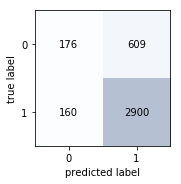

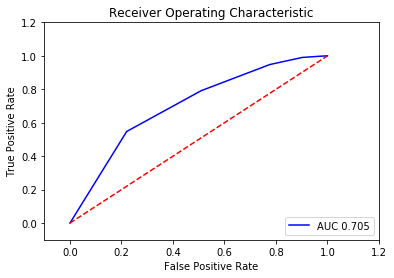

[[3427  107]
 [ 222   89]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      3534
          1       0.45      0.29      0.35       311

avg / total       0.90      0.91      0.91      3845



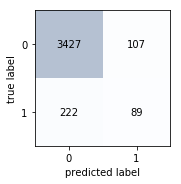

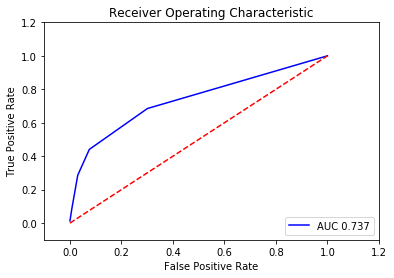

[[1756  440]
 [ 710  939]]
             precision    recall  f1-score   support

          0       0.71      0.80      0.75      2196
          1       0.68      0.57      0.62      1649

avg / total       0.70      0.70      0.70      3845



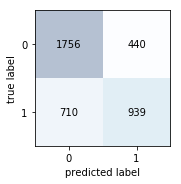

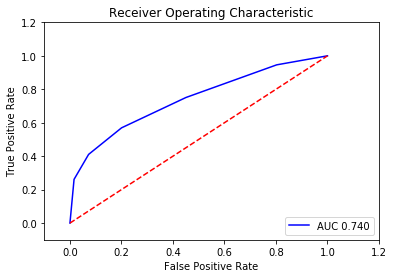

[[3729   21]
 [  82   13]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3750
          1       0.38      0.14      0.20        95

avg / total       0.96      0.97      0.97      3845



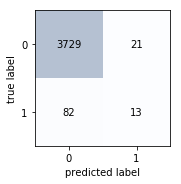

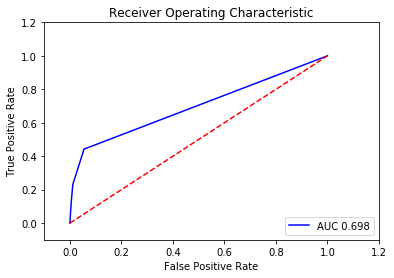

[[1900  353]
 [ 846  746]]
             precision    recall  f1-score   support

          0       0.69      0.84      0.76      2253
          1       0.68      0.47      0.55      1592

avg / total       0.69      0.69      0.67      3845



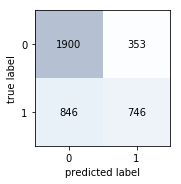

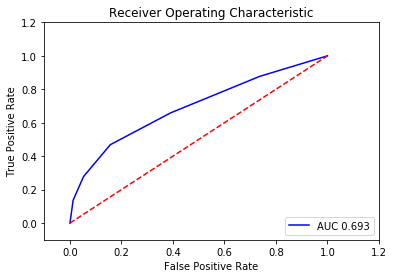

[[3506   40]
 [ 265   34]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      3546
          1       0.46      0.11      0.18       299

avg / total       0.89      0.92      0.90      3845



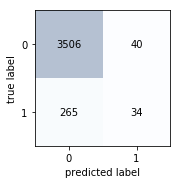

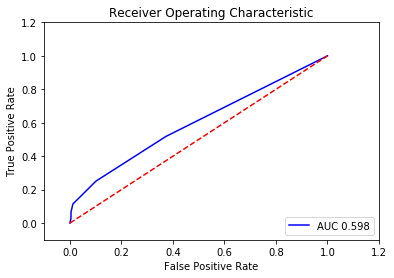

[[3127  117]
 [ 459  142]]
             precision    recall  f1-score   support

      False       0.87      0.96      0.92      3244
       True       0.55      0.24      0.33       601

avg / total       0.82      0.85      0.82      3845



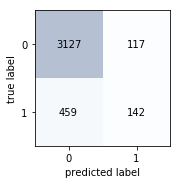

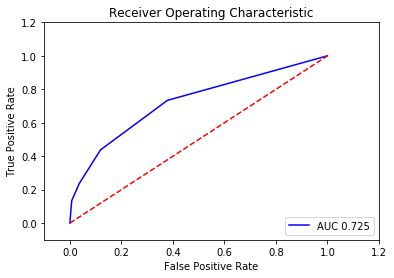

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=KNeighborsClassifier()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## BIGRAMS

In [4]:
target_x=pickle.load(open("../pickle/target_x2_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[  37  748]
 [  80 2980]]
             precision    recall  f1-score   support

          0       0.32      0.05      0.08       785
          1       0.80      0.97      0.88      3060

avg / total       0.70      0.78      0.72      3845



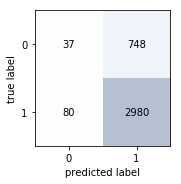

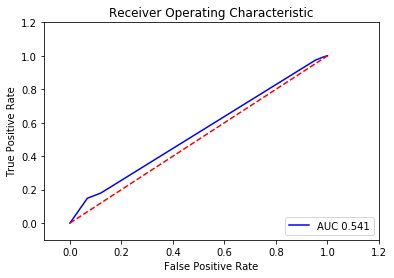

[[3478   51]
 [ 277   39]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.95      3529
          1       0.43      0.12      0.19       316

avg / total       0.89      0.91      0.89      3845



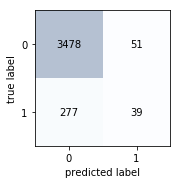

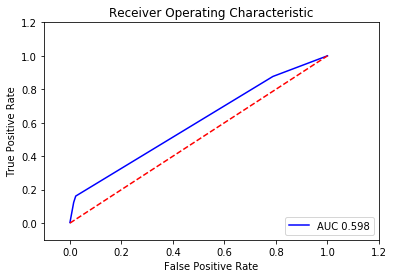

[[ 438 1704]
 [ 197 1506]]
             precision    recall  f1-score   support

          0       0.69      0.20      0.32      2142
          1       0.47      0.88      0.61      1703

avg / total       0.59      0.51      0.45      3845



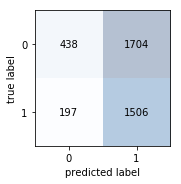

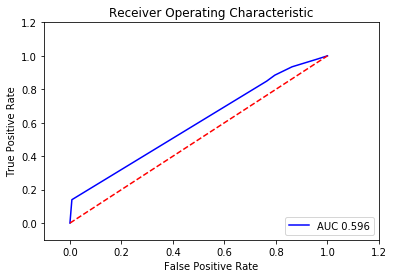

[[3762    0]
 [  83    0]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3762
          1       0.00      0.00      0.00        83

avg / total       0.96      0.98      0.97      3845



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


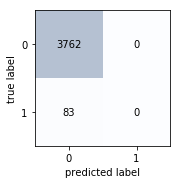

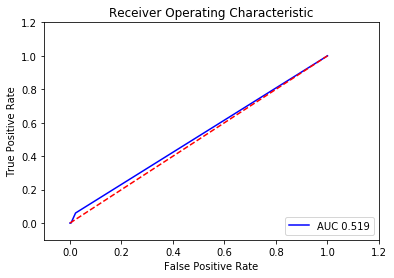

[[ 457 1823]
 [ 179 1386]]
             precision    recall  f1-score   support

          0       0.72      0.20      0.31      2280
          1       0.43      0.89      0.58      1565

avg / total       0.60      0.48      0.42      3845



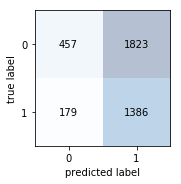

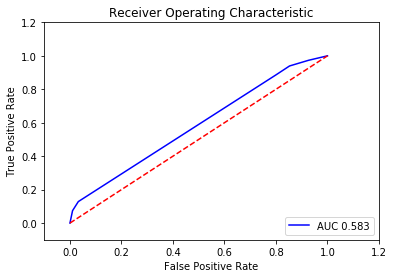

[[3551    5]
 [ 289    0]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      3556
          1       0.00      0.00      0.00       289

avg / total       0.86      0.92      0.89      3845



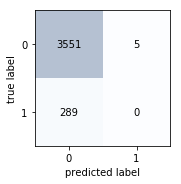

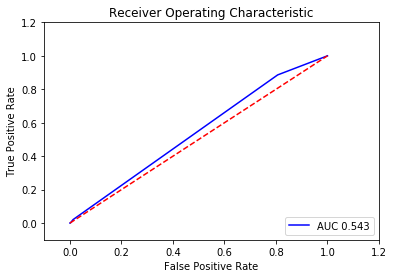

[[3193   43]
 [ 583   26]]
             precision    recall  f1-score   support

      False       0.85      0.99      0.91      3236
       True       0.38      0.04      0.08       609

avg / total       0.77      0.84      0.78      3845



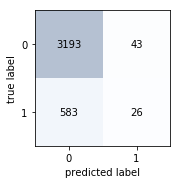

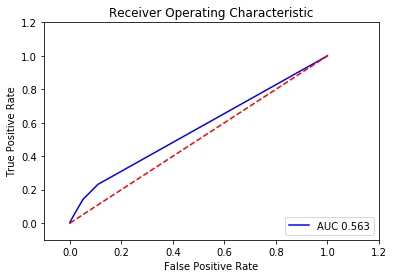

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=KNeighborsClassifier()
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## CHARNGRAM

In [6]:
target_x=pickle.load(open("../pickle/target_x3_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 404  381]
 [ 440 2620]]
             precision    recall  f1-score   support

          0       0.48      0.51      0.50       785
          1       0.87      0.86      0.86      3060

avg / total       0.79      0.79      0.79      3845



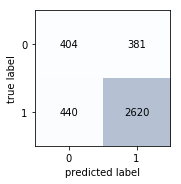

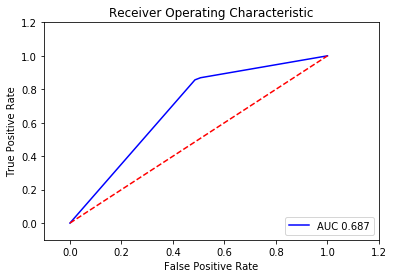

[[3130  399]
 [ 199  117]]
             precision    recall  f1-score   support

          0       0.94      0.89      0.91      3529
          1       0.23      0.37      0.28       316

avg / total       0.88      0.84      0.86      3845



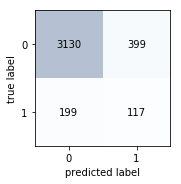

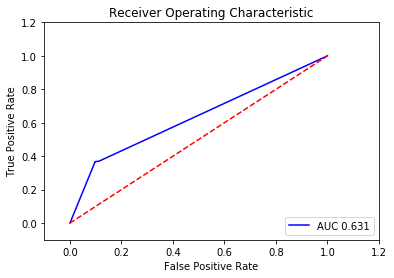

[[1761  376]
 [ 328 1380]]
             precision    recall  f1-score   support

          0       0.84      0.82      0.83      2137
          1       0.79      0.81      0.80      1708

avg / total       0.82      0.82      0.82      3845



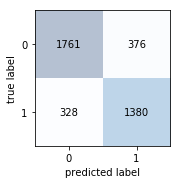

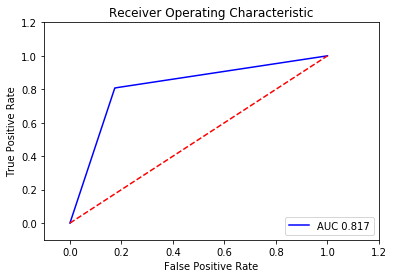

[[3624  114]
 [  71   36]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      3738
          1       0.24      0.34      0.28       107

avg / total       0.96      0.95      0.96      3845



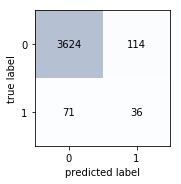

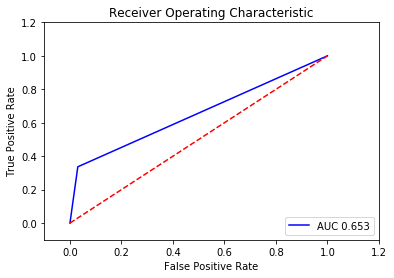

[[1614  669]
 [ 541 1021]]
             precision    recall  f1-score   support

          0       0.75      0.71      0.73      2283
          1       0.60      0.65      0.63      1562

avg / total       0.69      0.69      0.69      3845



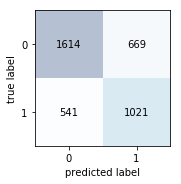

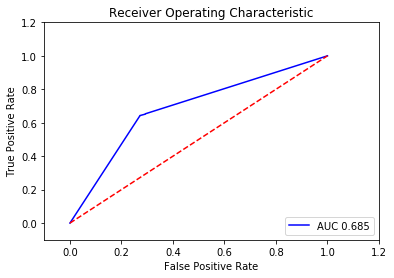

[[3245  297]
 [ 140  163]]
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      3542
          1       0.35      0.54      0.43       303

avg / total       0.91      0.89      0.90      3845



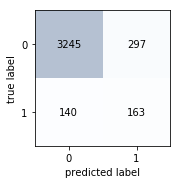

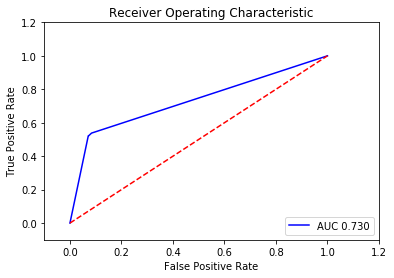

[[2960  280]
 [ 269  336]]
             precision    recall  f1-score   support

      False       0.92      0.91      0.92      3240
       True       0.55      0.56      0.55       605

avg / total       0.86      0.86      0.86      3845



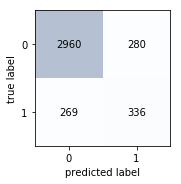

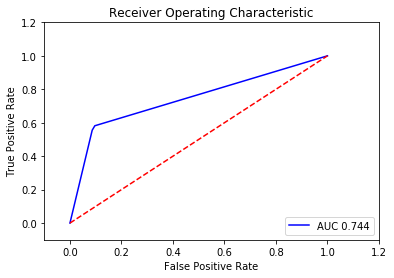

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## SELECTED FEATURES

In [8]:
target_x=pickle.load(open("../pickle/target_x4_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 226  559]
 [ 555 2505]]
             precision    recall  f1-score   support

          0       0.29      0.29      0.29       785
          1       0.82      0.82      0.82      3060

avg / total       0.71      0.71      0.71      3845



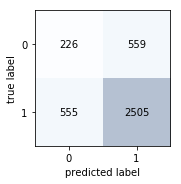

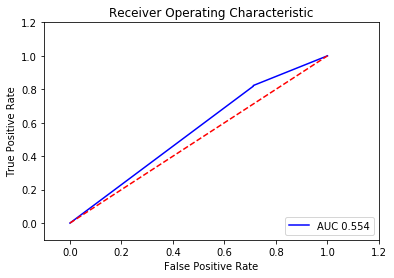

[[3274  264]
 [ 266   41]]
             precision    recall  f1-score   support

          0       0.92      0.93      0.93      3538
          1       0.13      0.13      0.13       307

avg / total       0.86      0.86      0.86      3845



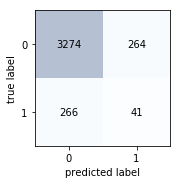

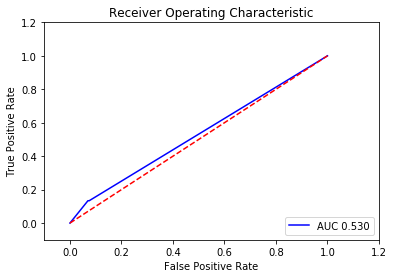

[[1212  885]
 [ 893  855]]
             precision    recall  f1-score   support

          0       0.58      0.58      0.58      2097
          1       0.49      0.49      0.49      1748

avg / total       0.54      0.54      0.54      3845



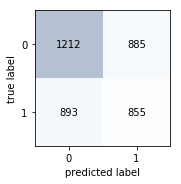

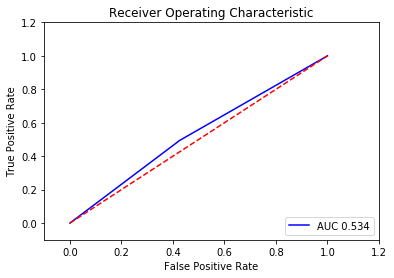

[[3644  108]
 [  89    4]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      3752
          1       0.04      0.04      0.04        93

avg / total       0.95      0.95      0.95      3845



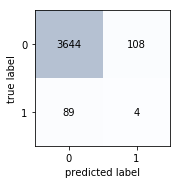

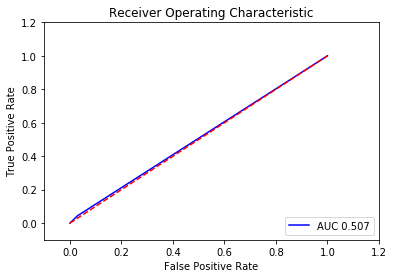

[[1441  835]
 [ 871  698]]
             precision    recall  f1-score   support

          0       0.62      0.63      0.63      2276
          1       0.46      0.44      0.45      1569

avg / total       0.55      0.56      0.56      3845



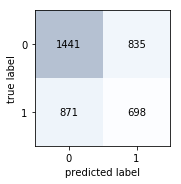

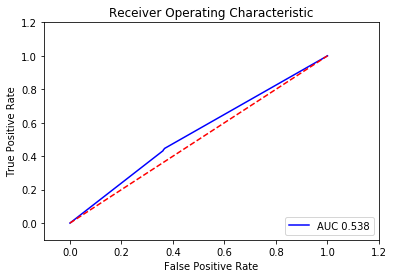

[[3269  255]
 [ 286   35]]
             precision    recall  f1-score   support

          0       0.92      0.93      0.92      3524
          1       0.12      0.11      0.11       321

avg / total       0.85      0.86      0.86      3845



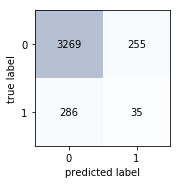

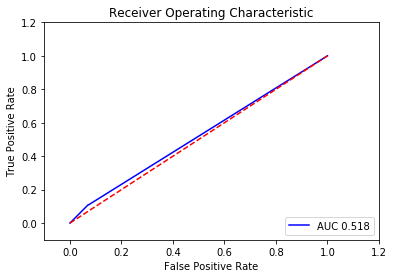

[[2790  474]
 [ 430  151]]
             precision    recall  f1-score   support

      False       0.87      0.85      0.86      3264
       True       0.24      0.26      0.25       581

avg / total       0.77      0.76      0.77      3845



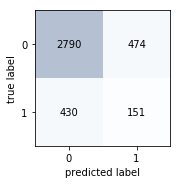

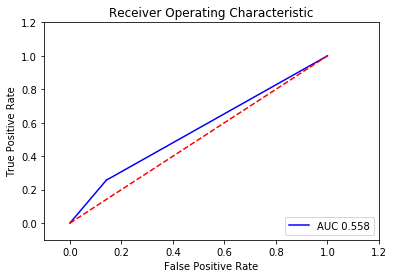

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
#dfindex=None
#dftoxic=None
#dfstoxic=None
#dfobscene=None
#dfthreat=None
#dfinsult=None
#dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## WORDVECTORS - GLOVE

In [10]:
target_x=pickle.load(open("../pickle/target_x5_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

print(target_x.shape)
print
X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

(19225, 3)


[[   0  785]
 [   0 3060]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       785
          1       0.80      1.00      0.89      3060

avg / total       0.63      0.80      0.71      3845



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


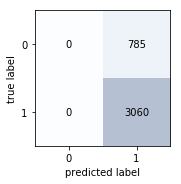

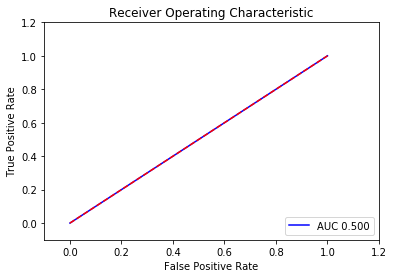

[[3540    0]
 [ 305    0]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      3540
          1       0.00      0.00      0.00       305

avg / total       0.85      0.92      0.88      3845



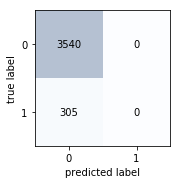

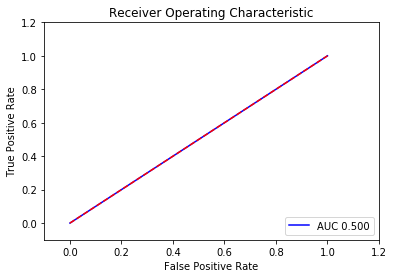

[[2136    0]
 [1709    0]]
             precision    recall  f1-score   support

          0       0.56      1.00      0.71      2136
          1       0.00      0.00      0.00      1709

avg / total       0.31      0.56      0.40      3845



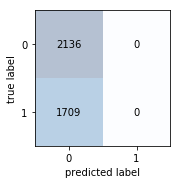

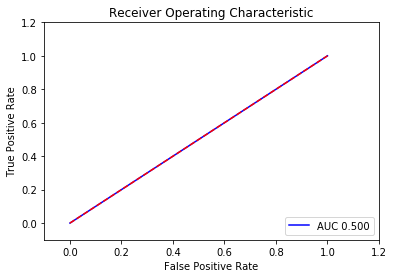

[[3752    0]
 [  93    0]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3752
          1       0.00      0.00      0.00        93

avg / total       0.95      0.98      0.96      3845



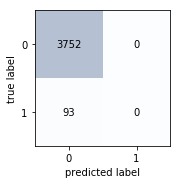

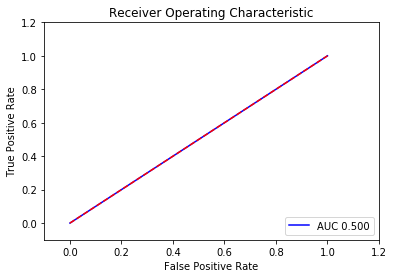

[[2271    0]
 [1574    0]]
             precision    recall  f1-score   support

          0       0.59      1.00      0.74      2271
          1       0.00      0.00      0.00      1574

avg / total       0.35      0.59      0.44      3845



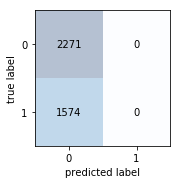

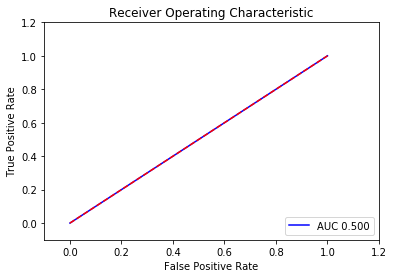

[[3572    0]
 [ 273    0]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      3572
          1       0.00      0.00      0.00       273

avg / total       0.86      0.93      0.89      3845



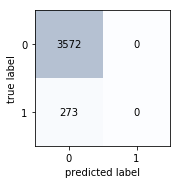

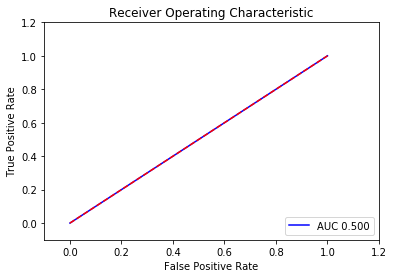

[[   0 3224]
 [   0  621]]
             precision    recall  f1-score   support

      False       0.00      0.00      0.00      3224
       True       0.16      1.00      0.28       621

avg / total       0.03      0.16      0.04      3845



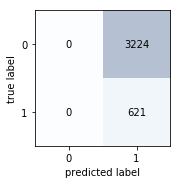

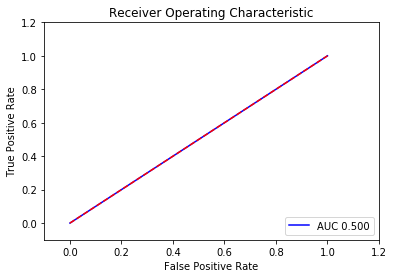

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
#     X_train=(pd.DataFrame(X_train.toarray()))
#     X_valid=(pd.DataFrame(X_valid.toarray()))
#     if i==0:
#         dfindex=((X_valid).iloc[:,0])
#     X_train=X_train.drop(X_train.columns[[0]], axis=1)
#     X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_bigrams,train_charngrams,train_unigrams,train_feats[SELECTED_COLS])).tocsr()

In [12]:
target_x=pickle.load(open("../pickle/target_x6_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 396  389]
 [ 399 2661]]
             precision    recall  f1-score   support

          0       0.50      0.50      0.50       785
          1       0.87      0.87      0.87      3060

avg / total       0.80      0.80      0.80      3845



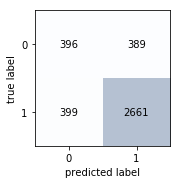

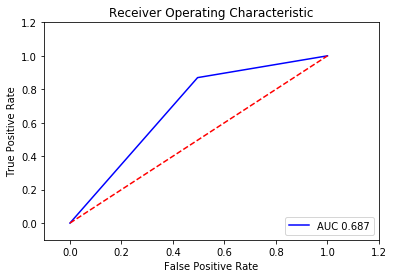

[[3191  322]
 [ 205  127]]
             precision    recall  f1-score   support

          0       0.94      0.91      0.92      3513
          1       0.28      0.38      0.33       332

avg / total       0.88      0.86      0.87      3845



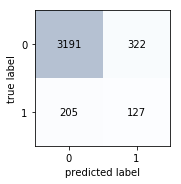

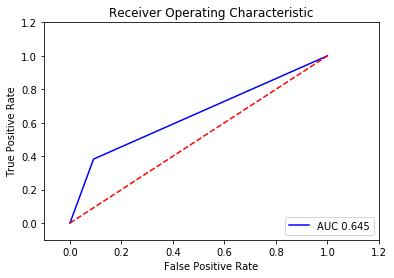

[[1825  337]
 [ 368 1315]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84      2162
          1       0.80      0.78      0.79      1683

avg / total       0.82      0.82      0.82      3845



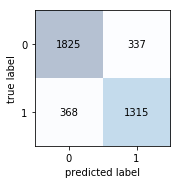

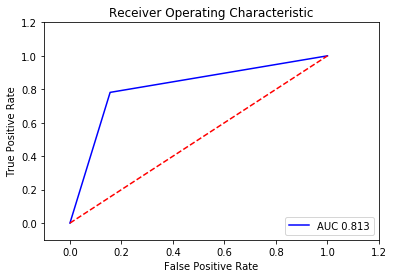

[[3616  126]
 [  61   42]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      3742
          1       0.25      0.41      0.31       103

avg / total       0.96      0.95      0.96      3845



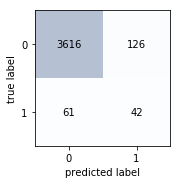

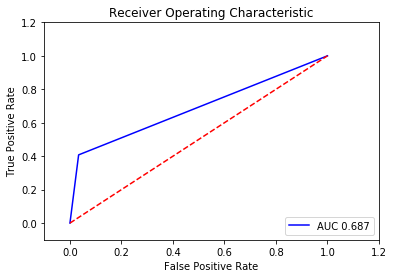

[[1624  655]
 [ 534 1032]]
             precision    recall  f1-score   support

          0       0.75      0.71      0.73      2279
          1       0.61      0.66      0.63      1566

avg / total       0.70      0.69      0.69      3845



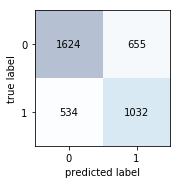

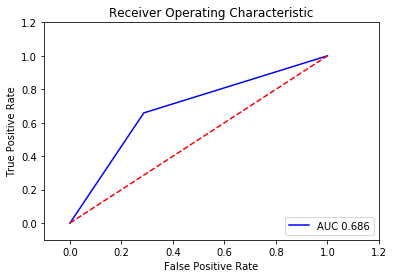

[[3299  254]
 [ 154  138]]
             precision    recall  f1-score   support

          0       0.96      0.93      0.94      3553
          1       0.35      0.47      0.40       292

avg / total       0.91      0.89      0.90      3845



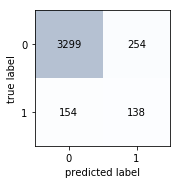

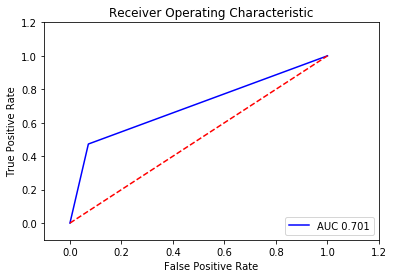

[[2932  271]
 [ 265  377]]
             precision    recall  f1-score   support

      False       0.92      0.92      0.92      3203
       True       0.58      0.59      0.58       642

avg / total       0.86      0.86      0.86      3845



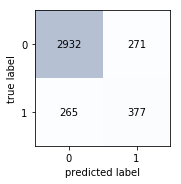

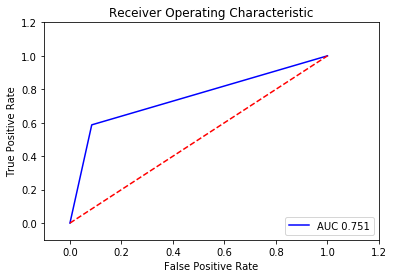

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_bigrams,train_unigrams)).tocsr()

In [14]:
target_x=pickle.load(open("../pickle/target_x7_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 405  380]
 [ 469 2591]]
             precision    recall  f1-score   support

          0       0.46      0.52      0.49       785
          1       0.87      0.85      0.86      3060

avg / total       0.79      0.78      0.78      3845



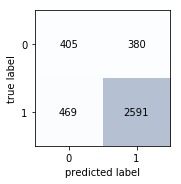

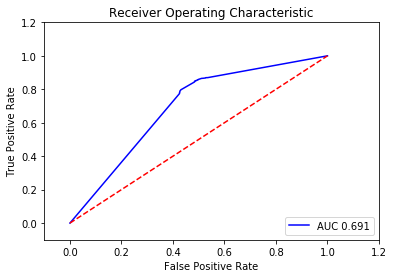

[[3126  406]
 [ 171  142]]
             precision    recall  f1-score   support

          0       0.95      0.89      0.92      3532
          1       0.26      0.45      0.33       313

avg / total       0.89      0.85      0.87      3845



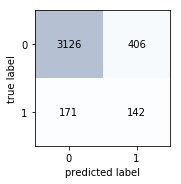

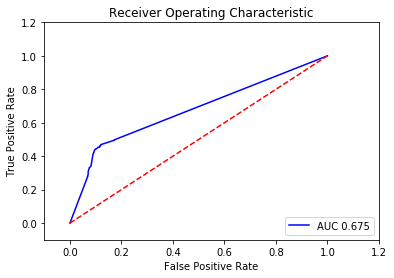

[[1743  402]
 [ 461 1239]]
             precision    recall  f1-score   support

          0       0.79      0.81      0.80      2145
          1       0.76      0.73      0.74      1700

avg / total       0.78      0.78      0.78      3845



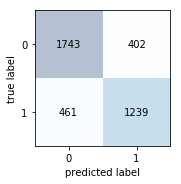

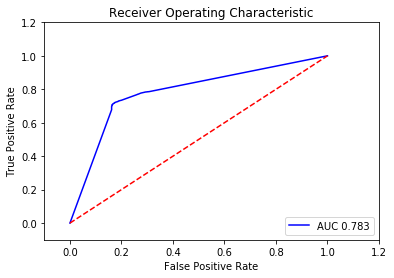

[[3408  351]
 [  56   30]]
             precision    recall  f1-score   support

          0       0.98      0.91      0.94      3759
          1       0.08      0.35      0.13        86

avg / total       0.96      0.89      0.93      3845



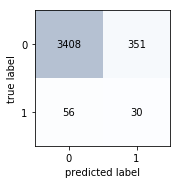

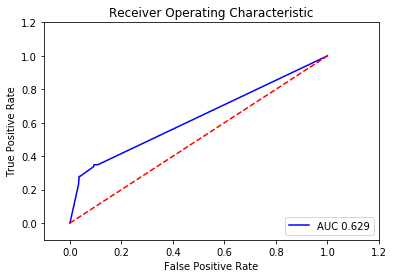

[[1638  642]
 [ 614  951]]
             precision    recall  f1-score   support

          0       0.73      0.72      0.72      2280
          1       0.60      0.61      0.60      1565

avg / total       0.67      0.67      0.67      3845



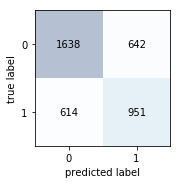

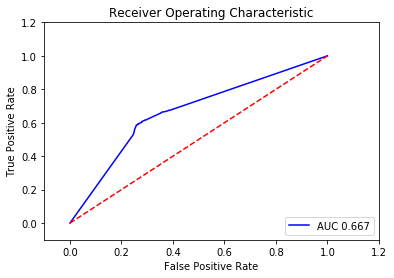

[[2937  613]
 [ 191  104]]
             precision    recall  f1-score   support

          0       0.94      0.83      0.88      3550
          1       0.15      0.35      0.21       295

avg / total       0.88      0.79      0.83      3845



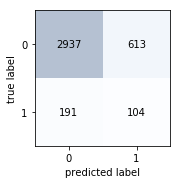

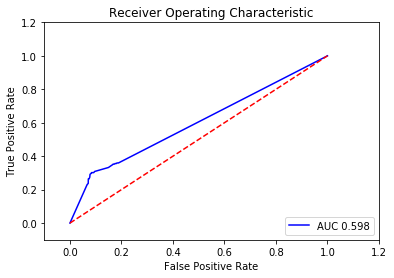

[[2857  354]
 [ 271  363]]
             precision    recall  f1-score   support

      False       0.91      0.89      0.90      3211
       True       0.51      0.57      0.54       634

avg / total       0.85      0.84      0.84      3845



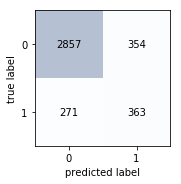

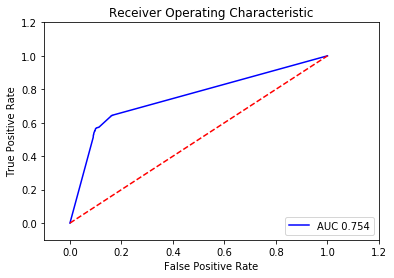

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_unigrams, train_charngrams)).tocsr()

In [16]:
target_x=pickle.load(open("../pickle/target_x8_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)

[[ 390  395]
 [ 405 2655]]
             precision    recall  f1-score   support

          0       0.49      0.50      0.49       785
          1       0.87      0.87      0.87      3060

avg / total       0.79      0.79      0.79      3845



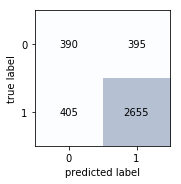

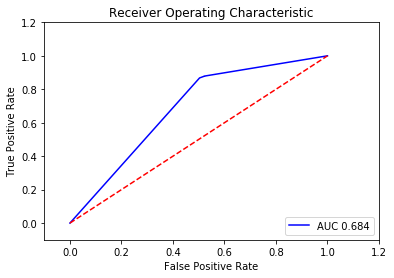

[[3226  329]
 [ 193   97]]
             precision    recall  f1-score   support

          0       0.94      0.91      0.93      3555
          1       0.23      0.33      0.27       290

avg / total       0.89      0.86      0.88      3845



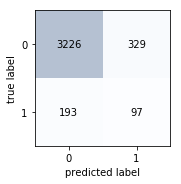

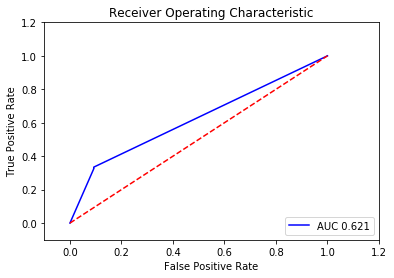

[[1789  366]
 [ 391 1299]]
             precision    recall  f1-score   support

          0       0.82      0.83      0.83      2155
          1       0.78      0.77      0.77      1690

avg / total       0.80      0.80      0.80      3845



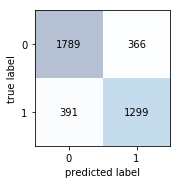

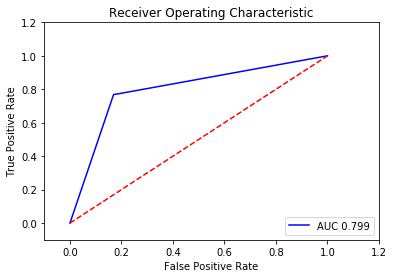

[[3608  135]
 [  55   47]]
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      3743
          1       0.26      0.46      0.33       102

avg / total       0.97      0.95      0.96      3845



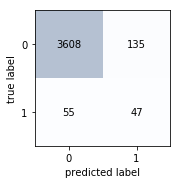

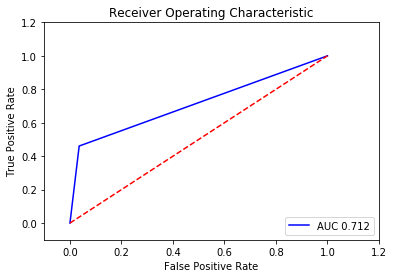

[[1637  651]
 [ 517 1040]]
             precision    recall  f1-score   support

          0       0.76      0.72      0.74      2288
          1       0.62      0.67      0.64      1557

avg / total       0.70      0.70      0.70      3845



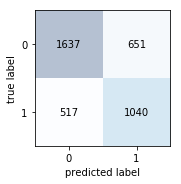

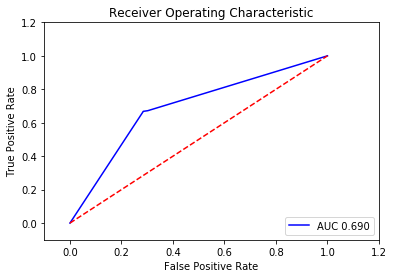

[[3247  293]
 [ 148  157]]
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      3540
          1       0.35      0.51      0.42       305

avg / total       0.91      0.89      0.90      3845



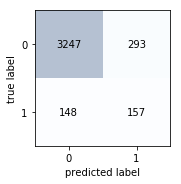

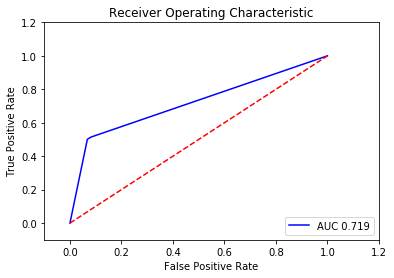

[[2875  349]
 [ 257  364]]
             precision    recall  f1-score   support

      False       0.92      0.89      0.90      3224
       True       0.51      0.59      0.55       621

avg / total       0.85      0.84      0.85      3845



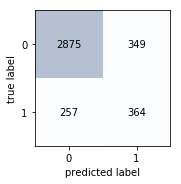

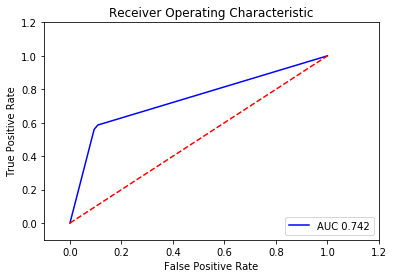

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   


## hstack((train_unigrams, train_charngrams,train_bigrams)).tocsr()

In [18]:
target_x=pickle.load(open("../pickle/target_x9_mlnew.pkl", "rb" ))
target_y=pickle.load(open("../pickle/target_yml.pkl", "rb" ))

X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20, random_state=112)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=112)
y_test.shape

(3076, 7)

[[ 405  380]
 [ 423 2637]]
             precision    recall  f1-score   support

          0       0.49      0.52      0.50       785
          1       0.87      0.86      0.87      3060

avg / total       0.80      0.79      0.79      3845



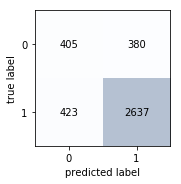

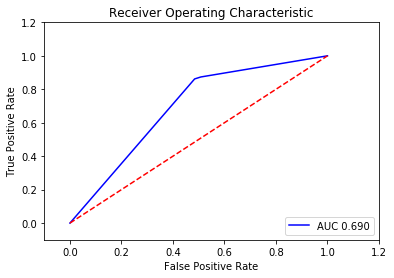

[[3186  351]
 [ 188  120]]
             precision    recall  f1-score   support

          0       0.94      0.90      0.92      3537
          1       0.25      0.39      0.31       308

avg / total       0.89      0.86      0.87      3845



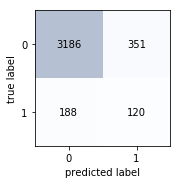

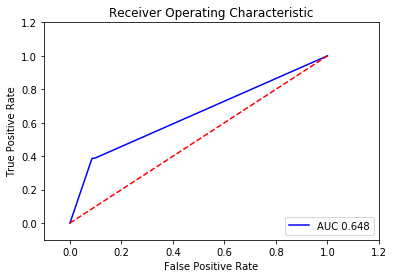

[[1770  398]
 [ 365 1312]]
             precision    recall  f1-score   support

          0       0.83      0.82      0.82      2168
          1       0.77      0.78      0.77      1677

avg / total       0.80      0.80      0.80      3845



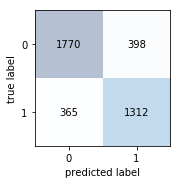

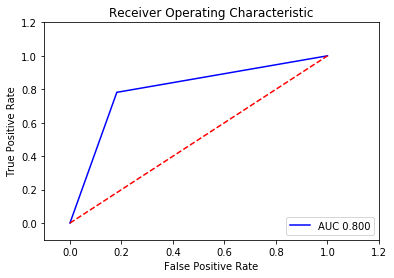

[[3618  129]
 [  69   29]]
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      3747
          1       0.18      0.30      0.23        98

avg / total       0.96      0.95      0.95      3845



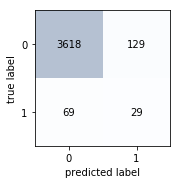

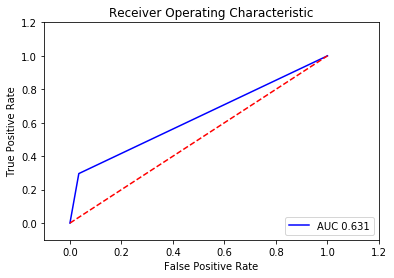

[[1639  617]
 [ 578 1011]]
             precision    recall  f1-score   support

          0       0.74      0.73      0.73      2256
          1       0.62      0.64      0.63      1589

avg / total       0.69      0.69      0.69      3845



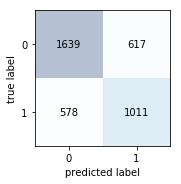

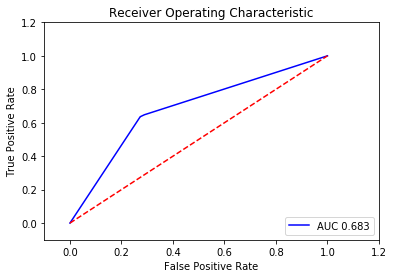

[[3304  277]
 [ 121  143]]
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      3581
          1       0.34      0.54      0.42       264

avg / total       0.92      0.90      0.91      3845



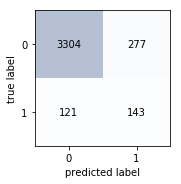

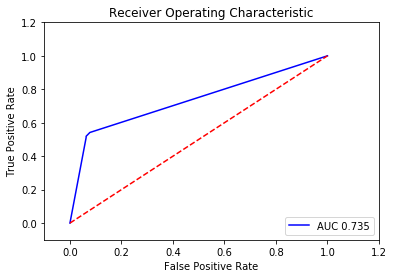

[[2982  276]
 [ 245  342]]
             precision    recall  f1-score   support

      False       0.92      0.92      0.92      3258
       True       0.55      0.58      0.57       587

avg / total       0.87      0.86      0.87      3845



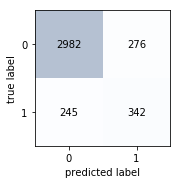

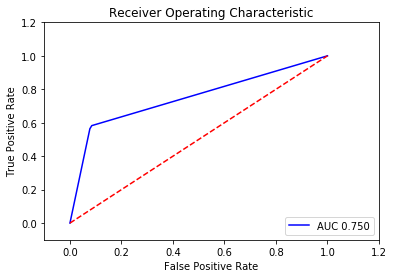

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
%matplotlib inline
model=DecisionTreeClassifier(class_weight="balanced")
dfindex=None
dftoxic=None
dfstoxic=None
dfobscene=None
dfthreat=None
dfinsult=None
dfih=None
for i, j in enumerate(TARGET_COLS):
    
    X_train=(pd.DataFrame(X_train.toarray()))
    X_valid=(pd.DataFrame(X_valid.toarray()))
    if i==0:
        dfindex=((X_valid).iloc[:,0])
    X_train=X_train.drop(X_train.columns[[0]], axis=1)
    X_valid=X_valid.drop(X_valid.columns[[0]], axis=1)
    
    
    model.fit(X_train,y_train[j])
    bb = model.predict_proba(X_valid)[:, 1]
    cc = model.predict(X_valid)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid[j], bb)
    cfm=(confusion_matrix(y_valid[j],cc))
    print(cfm)
    print(classification_report(y_valid[j],cc))
    fig, ax = plot_confusion_matrix(conf_mat=cfm)
    plt.show()
    score=(roc_auc_score(y_valid[j],bb))
    roc_curve(y_valid[j].values, bb)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC %0.3f' % score)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    X_train, X_valid, y_train, y_valid = train_test_split(target_x, target_y, test_size=0.20)
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20)
    if i==0:
        dftoxic=pd.DataFrame(cc)
        
        dftoxica=pd.DataFrame(y_valid[j])
    if i==1:
        dfstoxic=pd.DataFrame(cc)
        dfstoxica=pd.DataFrame(y_valid[j])
        
    if i==2:
        dfobscene=pd.DataFrame(cc)
        dfobscenea=pd.DataFrame(y_valid[j])
        
    if i==3:
        dfthreat=pd.DataFrame(cc)
        dfthreata=pd.DataFrame(y_valid[j])
    if i==4:
        dfinsult=pd.DataFrame(cc)
        dfinsulta=pd.DataFrame(y_valid[j])
    if i==5:
        dfih=pd.DataFrame(cc)
        dfiha=pd.DataFrame(y_valid[j])
    #print(y_valid[j])

#dff=pd.concat([dfindex,dftoxic,dfstoxic,dfobscene,dfthreat,dfinsult,dfih,],axis=1)#X_train.drop(X_train.columns[[0]], axis=1)
#dff.columns=['index','toxic','stoxic','obscene',"threat","insult","identity_hate"]#,'toxic_actual','stoxic_actual','obscene_actual',"threat_actual","insult_actual","identity_hate_actual"]
#dff.to_csv("Final_result.csv")
#df2=pd.read_csv("ml_dataset.csv")
#aa=pd.merge(dff, df2)
#aa=aa.drop(aa.columns[[1,2,3,4]], axis=1)
#aa=pd.merge(aa, pd.read_csv("./data/train.csv"), on='id')

#aa.to_csv("Results_merge_unigram_ml.csv")
   
